In [25]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import gradio as gr
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [23]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


In [11]:
model = YOLO('yolov8n_dental.pt')

NameError: name 'YOLO' is not defined

In [13]:
def proceed_yolo_obj_detection(image):
    try:
        result = model(image[:, :, ::-1], save=True)
    except Exception as e:
        print(e)
        return

    class_names = result[0].names
    bg_colors = [(81, 16, 194), (194, 16, 75), (16, 78, 194), (156, 154, 145)]
    for i in range(len(result[0].boxes.data)):
        name = class_names[int(result[0].boxes.cls[i])]
        conf = round(float(result[0].boxes.conf[i]), 2)
        x1, y1, x2, y2 = [int(i) for i in result[0].boxes.xyxy[i]]

        text = f'{name} {conf}'
        font = cv2.FONT_HERSHEY_COMPLEX_SMALL
        font_scale = 0.8
        font_thickness = 2
        text_color = (255, 255, 255)
        bg_color = bg_colors[int(result[0].boxes.cls[i])]
        (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)

        cv2.rectangle(image, (x1, y1 - text_height - baseline), (x1 + text_width, y1), bg_color, -1)
        cv2.putText(image, text, (x1, y1-5), font, font_scale, text_color, font_thickness)
        cv2.rectangle(image, (x1, y1), (x2, y2), bg_color, 2)
    return image

In [33]:
demo = gr.Interface(proceed_yolo_obj_detection, inputs = gr.Image(), outputs= gr.Image(), live=True, title='dental radiography'.title())

demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.



0: 320x640 1 Fillings, 1 Cavity, 172.7ms
Speed: 14.6ms preprocess, 172.7ms inference, 22.4ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict6
'NoneType' object is not subscriptable

0: 320x640 2 Fillingss, 120.6ms
Speed: 7.5ms preprocess, 120.6ms inference, 2.7ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict6

0: 320x640 4 Fillingss, 121.1ms
Speed: 7.1ms preprocess, 121.1ms inference, 8.7ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict6

0: 320x640 1 Impacted Tooth, 1 Cavity, 49.4ms
Speed: 12.1ms preprocess, 49.4ms inference, 7.9ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict6
'NoneType' object is not subscriptable

0: 320x640 11 Fillingss, 63.9ms
Speed: 9.4ms preprocess, 63.9ms inference, 5.1ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict6


In [12]:
def dental_radiography(image):
    img = image[:, :, ::-1]
#     image = np.array(image)
    
    result = model(source=image)
    print(result)
    for box in result[0].boxes.xyxy:
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
#         print(x1, y1, x2, y2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img

In [25]:
cv2.rectangle??

In [81]:
img_pth = r"D:\datasets\Dental Radiography\runs\detect\predict\0007_jpg.rf.3699155bba57d7aecb1aa801a698ba20.jpg"

In [83]:
cv2.imwrite('test.png', (proceed_yolo_obj_detection(cv2.imread(img_pth))))


0: 320x640 5 Implants, 2 Fillingss, 89.0ms
Speed: 7.0ms preprocess, 89.0ms inference, 7.0ms postprocess per image at shape (1, 3, 320, 640)


True

In [3]:
img = cv2.imread(r"D:\datasets\Dental Radiography\data\images\train\0016_jpg.rf.e5788ea3cb728d461314e96c2e4c1b8f.jpg")

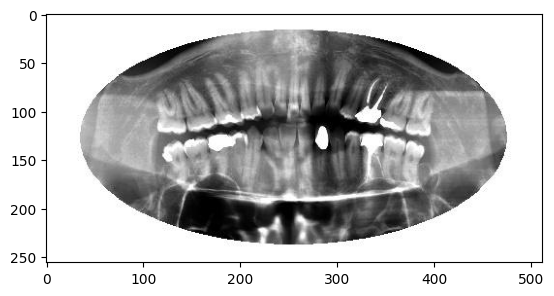

In [4]:
plt.imshow(img[:, :, ::-1])

In [20]:
result = model(img)


0: 320x640 4 Implants, 8 Fillingss, 1 Cavity, 103.0ms
Speed: 14.1ms preprocess, 103.0ms inference, 36.1ms postprocess per image at shape (1, 3, 320, 640)


In [21]:
class_names = result[0].names
class_names

{0: 'Implant', 1: 'Fillings', 2: 'Impacted Tooth', 3: 'Cavity'}

In [22]:
bg_colors = [(81, 16, 194), (194, 16, 75), (16, 78, 194), (156, 154, 145)]

In [23]:
result[0].boxes.data

tensor([[3.1896e+02, 6.3362e+01, 3.5510e+02, 1.1589e+02, 9.1955e-01, 0.0000e+00],
        [3.2322e+02, 1.2205e+02, 3.4869e+02, 1.7274e+02, 8.6631e-01, 0.0000e+00],
        [1.6716e+02, 1.2310e+02, 1.9300e+02, 1.7163e+02, 7.9055e-01, 1.0000e+00],
        [1.8958e+02, 1.1609e+02, 2.0877e+02, 1.7324e+02, 6.3384e-01, 1.0000e+00],
        [2.7670e+02, 1.1414e+02, 2.9296e+02, 1.7146e+02, 5.9525e-01, 1.0000e+00],
        [1.5976e+02, 7.3230e+01, 1.7678e+02, 1.1927e+02, 4.4697e-01, 0.0000e+00],
        [2.7641e+02, 1.1558e+02, 2.9262e+02, 1.7209e+02, 4.4027e-01, 0.0000e+00],
        [1.3853e+02, 7.2253e+01, 1.6653e+02, 1.2214e+02, 4.1936e-01, 3.0000e+00],
        [3.4502e+02, 7.5771e+01, 3.7846e+02, 1.2302e+02, 4.0656e-01, 1.0000e+00],
        [1.5964e+02, 7.3555e+01, 1.7762e+02, 1.1973e+02, 3.9027e-01, 1.0000e+00],
        [1.4222e+02, 1.2835e+02, 1.6943e+02, 1.7128e+02, 3.8181e-01, 1.0000e+00],
        [1.1941e+02, 1.3020e+02, 1.4650e+02, 1.7011e+02, 3.3008e-01, 1.0000e+00],
        [1.6515e

In [24]:
[int(i) for i in result[0].boxes.xyxy[0]]

[318, 63, 355, 115]

In [25]:
for i in range(len(result[0].boxes.data)):
    name = class_names[int(result[0].boxes.cls[i])]
    conf = round(float(result[0].boxes.conf[i]), 2)
    x1, y1, x2, y2 = [int(i) for i in result[0].boxes.xyxy[i]]

In [26]:
text = f'{name} {conf}'
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
font_scale = 0.8
font_thickness = 2
text_color = (255, 255, 255)
bg_color = bg_colors[int(result[0].boxes.cls[i])]
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)

cv2.rectangle(img, (x1, y1 - text_height - baseline), (x1 + text_width, y1), bg_color, -1)
cv2.putText(img, text, (x1, y1-5), font, font_scale, text_color, font_thickness)
cv2.rectangle(img, (x1, y1), (x2, y2), bg_color, 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

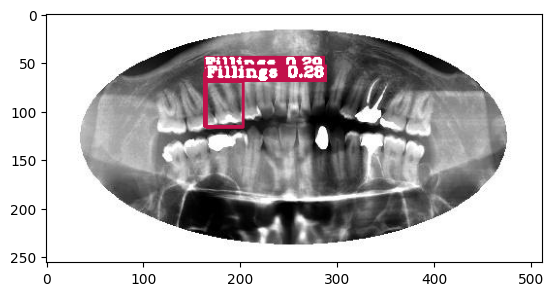

In [27]:
plt.imshow(img)

In [29]:
img = cv2.imread(r"C:\Users\skahi\Downloads\types-of-bots.jpg")

In [31]:
img[:, :, ::-1]

array([[[ 10,  19,  36],
        [ 10,  19,  36],
        [ 11,  20,  37],
        ...,
        [  4,  10,  22],
        [  3,   9,  21],
        [  3,   9,  21]],

       [[ 10,  19,  36],
        [ 11,  20,  37],
        [ 11,  20,  37],
        ...,
        [  4,  10,  22],
        [  3,   9,  21],
        [  3,   9,  21]],

       [[ 11,  20,  37],
        [ 11,  20,  37],
        [ 11,  20,  37],
        ...,
        [  4,  10,  22],
        [  4,  10,  22],
        [  3,   9,  21]],

       ...,

       [[ 63,  93, 119],
        [ 63,  93, 119],
        [ 63,  93, 119],
        ...,
        [  8,  11,  16],
        [  8,  11,  16],
        [  8,  11,  16]],

       [[ 61,  91, 117],
        [ 61,  91, 117],
        [ 61,  91, 117],
        ...,
        [  8,  11,  16],
        [  8,  11,  16],
        [  8,  11,  16]],

       [[ 59,  89, 115],
        [ 60,  90, 116],
        [ 60,  90, 116],
        ...,
        [  8,  11,  16],
        [  8,  11,  16],
        [  8,  11,  16]]

In [ ]:
YOLOv8

In [ ]:
VOC